In [1]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Dataset.csv')

In [ ]:
"""
Performed all these task in the data as EDA:
df.head()
df.info()
df.isnull().sum()
df.dropna(axis = 0,inplace = True)

"""

TASK 1 :  TABLE BOOKING AND ONLINE DELIVERY 
* Determine the percentage of restaurants that 
offer table booking and online delivery
* Compare the average ratings of restaurants 
with table booking and those without
* Analyze the availability of online delivery 
among restaurants with different price ranges...

In [7]:
#Checking the percentage of restaurants having table booking
table_booking = (df['Has Table booking']=='Yes').mean()*100
print("Percentage of restaurants offering table booking service is :",table_booking.round(2))

Percentage of restaurants offering table booking service is : 12.12


In [8]:
#Checking the percentage of restaurants having online delivery
online_delivery = (df['Has Online delivery']=='Yes').mean()*100
print("Percentage of restaurants offering online delivery service is :",online_delivery.round(2))

Percentage of restaurants offering online delivery service is : 25.66


In [9]:
#Creating a copy of data for changing values
df_copy=df.copy()

In [11]:
#Getting unique values in the 'Has table booking' column
df_copy['Has Table booking'].unique()

array(['Yes', 'No'], dtype=object)

In [12]:
#Replace 'obejct' datatype to numeric values of (0,1)
df_copy['Has Table booking']= df['Has Table booking'].replace({'Yes':0,'No':1})

In [13]:
#Getting average with and without tabel booking 
average_with_table_booking = df_copy[df_copy['Has Table booking']==0]['Aggregate rating'].mean()
average_without_table_booking =df_copy[df_copy['Has Table booking']==1]['Aggregate rating'].mean()

print('The restaurants average rating with tabel booking service provide is : ',average_with_table_booking.round(2))
print('The restaurants average rating without tabel booking service provide is : ',average_without_table_booking.round(2))

The restaurants average rating with tabel booking service provide is :  3.44
The restaurants average rating without tabel booking service provide is :  2.56


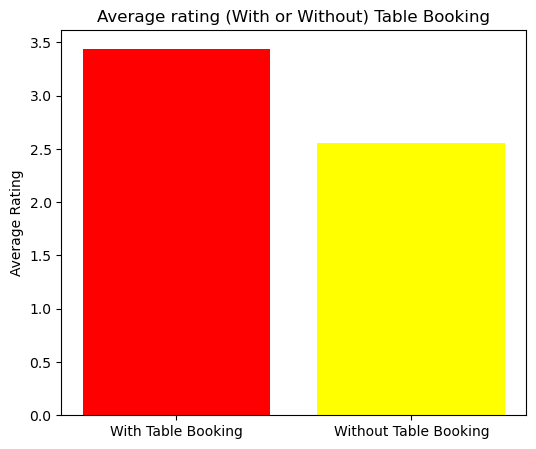

In [14]:
#Plotting Bar Graph for the generated data 
ratings = [average_with_table_booking,average_without_table_booking]
index = ['With Table Booking', 'Without Table Booking']

plt.figure(figsize=(6,5))
plt.bar(index,ratings,color =['red','Yellow'])
plt.title('Average rating (With or Without) Table Booking')
plt.ylabel("Average Rating")
plt.show()

In [17]:
#Checking unique value for the other features of data
df_copy['Price range'].unique()

array([3, 4, 2, 1], dtype=int64)

In [18]:
df_copy['Has Online delivery'].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
#Converting values in numeric values
df_copy['Has Online delivery']=df_copy['Has Online delivery'].replace({'Yes':0,'No': 1})

In [22]:
#Analyzing the propability
price_range= df_copy.groupby('Price range')['Has Online delivery'].mean()*100
price_range

Price range
1    84.225923
2    58.689367
3    70.809659
4    90.955631
Name: Has Online delivery, dtype: float64

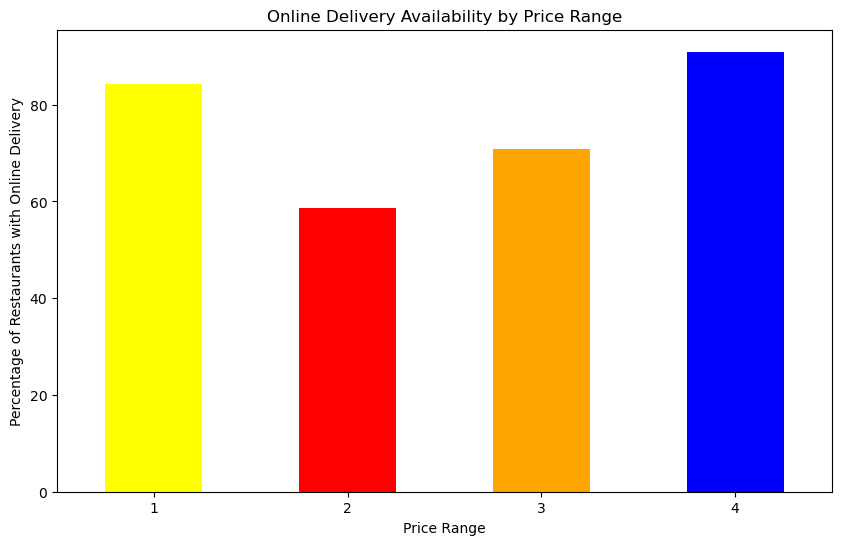

In [28]:
#Plotting Bar graph for the acquired data
plt.figure(figsize=(10, 6))
price_range.plot(kind='bar', color=['yellow','red','orange','blue'])
plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Restaurants with Online Delivery')
plt.xticks(rotation=0)
plt.show()

TASK 2 : PRICE RANGE ANALYSIS
* Determine the most common price range 
among all the restaurants
* Calculate the average rating for each price 
range
* Identify the color that represents the highest 
average rating among different price ranges...

In [29]:
#Getting the most common price in all the restaurants
common_counts = df['Price range'].value_counts().idxmax()
print('The most common price range in all the restaurants is :',common_counts)

The most common price range in all the restaurants is : 1


In [30]:
#Getting the average rating based on price range and aggregate rating
average_rating= df.groupby('Price range')['Aggregate rating'].mean()
average_rating

Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64

In [33]:
#Identifying the color that represents the highest average rating among different price ranges.
rating_color_by_price_range = df.groupby('Price range')['Rating color'].first() 

price_range_ratings = pd.DataFrame({
    'Average Rating': average_rating,
    'Rating Color': rating_color_by_price_range
})

highest_avg_rating_color = price_range_ratings.loc[price_range_ratings['Average Rating'].idxmax()]
print(f"The color that represents the highest average rating among different price ranges is: {highest_avg_rating_color['Rating Color']}")

The color that represents the highest average rating among different price ranges is: Green


TASK 3 : FEATURE ENGINEERING
* Extract additional features from the existing 
columns, such as the length of the restauran 
name or addres
* Create new features like "Has Table Booking" 
or "Has Online Delivery" by encodin 
categorical variables..

In [34]:
#Extracting additional features from the existing columns, such as the length of the restaurant name or address.

df['Restaurant Name Length'] = df['Restaurant Name'].str.len()
df['Address Length'] = df['Address'].str.len()

df[['Restaurant Name', 'Restaurant Name Length', 'Address', 'Address Length']].head()

,Restaurant Name,Restaurant Name Length,Address,Address Length
0,Le Petit Souffle,16,"Third Floor, Century City Mall, Kalayaan Avenu...",71
1,Izakaya Kikufuji,16,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",67
2,Heat - Edsa Shangri-La,22,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...",56
3,Ooma,4,"Third Floor, Mega Fashion Hall, SM Megamall, O...",70
4,Sambo Kojin,11,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",64


In [36]:
#Creating new features like "has table booking" and "has online delivery" as numeric values

df['has table booking']=df['Has Table booking'].replace({'Yes':0,'No':1})
df['has online delivery']=df['Has Online delivery'].replace({'Yes':0,'No':1})
df[['Has Table booking','has table booking','Has Online delivery','has online delivery']].head()

,Has Table booking,has table booking,Has Online delivery,has online delivery
0,Yes,0,No,1
1,Yes,0,No,1
2,Yes,0,No,1
3,No,1,No,1
4,Yes,0,No,1
